In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor 

In [2]:
WRITE_PATH = Path('C:\\', 'Temp', 'Screening_Result')
SAVE_FIGURE = [True, Path('C:\\', 'Temp', 'Screening_Figures')]

In [3]:
data1 = pd.read_csv(Path(WRITE_PATH,'2019','12','05','caged','results','all_results.csv'))
data2 = pd.read_csv(Path(WRITE_PATH,'2020','02','06','caged','results','all_results.csv'))
all_data = pd.concat([data1,data2])
all_data = all_data.replace([np.inf, -np.inf], np.nan)
fit_noerrors = all_data[all_data['error']==0] # <<<<<<< the data that passed all fitting hurdles!
fit_hasdarkframe = all_data[all_data['error']==8]  # <<<<<<< the data that was corrected for "dark frame", but otherwise passed all hurdles!
errorfree_data = pd.concat([fit_noerrors,fit_hasdarkframe])  # <<<<<<< We only look at the errorfree data!

In [4]:
#changing the names appearing on the plot
errorfree_data.condition = errorfree_data.condition.replace('RNAiMAX_reagent_only', 'RNAiMAX reagent')
errorfree_data.condition = errorfree_data.condition.replace('Untransfected_cells', 'Untransfected cells')
errorfree_data.condition = errorfree_data.condition.replace('1uM_Cilostamide', '1μM Cilostamide')
errorfree_data.condition = errorfree_data.condition.replace('100uM_IBMX','100μM IBMX')
errorfree_data.condition = errorfree_data.condition.replace('Double-KD_PDE3A&10A','Double-KD: PDE3A & 10A')
errorfree_data.condition = errorfree_data.condition.replace('100uM_IBMX_+_1uM_Cilostamide','1μM Cilo & 100μM IBMX')

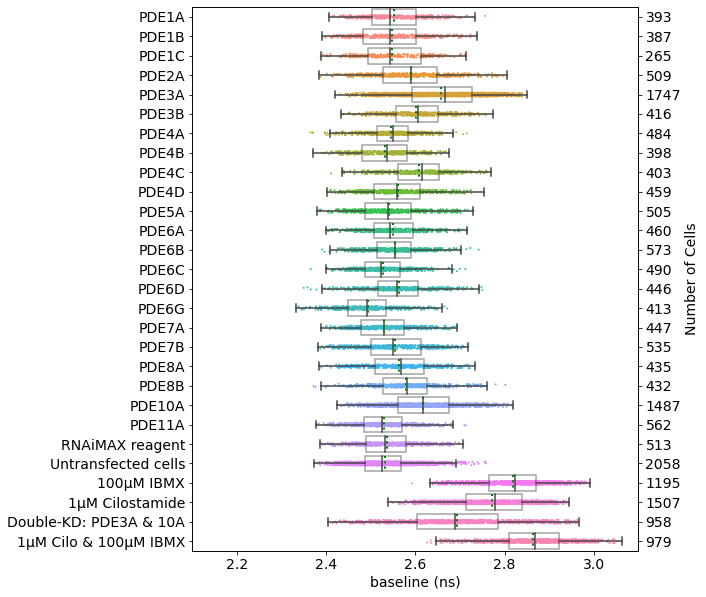

In [5]:
title = 'Fig_S4A'
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
fig, ax = plt.subplots()
x_val=errorfree_data['start tau(ns)']
sns.stripplot(ax=ax, x=x_val, y="condition", data=errorfree_data, size=2, zorder=0)
bbox_props = dict(facecolor="none", alpha=0.5, )
sns.boxplot(ax=ax, x=x_val, y="condition", boxprops=bbox_props,
            data=errorfree_data, showmeans=True,
            meanprops={"linestyle":":", "linewidth":"2", "color":"green"}, meanline=True,
            showfliers=False, zorder=1)
ax2 = ax.twinx()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel("Number of Cells")
# generate ticks with the nr of cells
allconditions = errorfree_data.condition.unique()
# yaxis runs from 0 to 1 if there would be 10 conditions they would be at 0.05 0.15 .. 0.85 0.95
ticks = [1 / (2 * (len(allconditions)))]
for i in range(0, len(allconditions) - 1):
    ticks.append(ticks[i] + 1 / (len(allconditions)))
ax2.set_yticks(ticks)
yticklabels = []
for condition in allconditions:
    yticklabels.append(str(sum(errorfree_data['condition'] == condition)))
ax2.set_yticklabels(reversed(yticklabels))
ax.yaxis.set_label_text("") # we loose the y-axis title "condition"
fig.set_size_inches([8, 10])
#ax.set_title(title, size=14)
ax.xaxis.set_label_text('baseline (ns)')
plt.xlim(2.1, 3.1)
fig.savefig(Path(SAVE_FIGURE[1], title+'.svg'),dpi=600, bbox_inches = 'tight')

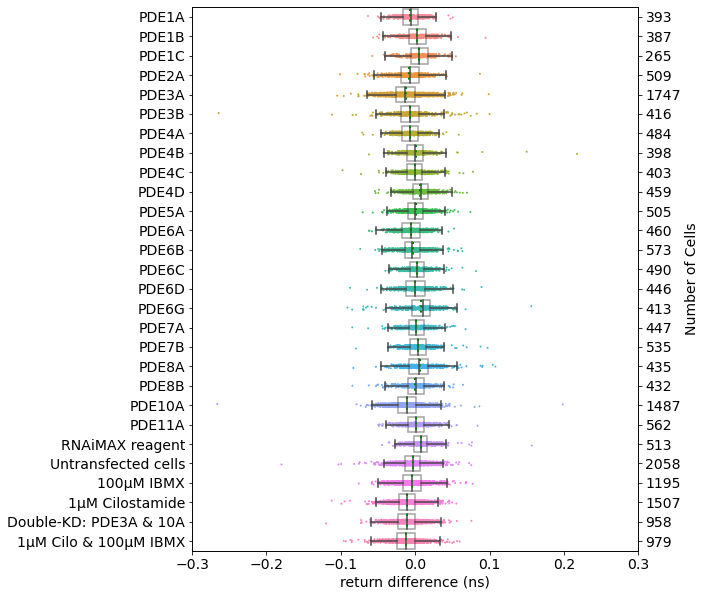

In [6]:
# calcluate start_finish
errorfree_data.loc[:,'finish tau(ns)'] = errorfree_data.loc[:,'start(ns)'].copy() + errorfree_data.loc[:,'range(ns)'].copy()
errorfree_data.loc[:,'return diff(ns)'] = errorfree_data.loc[:,'finish tau(ns)'].copy() - errorfree_data.loc[:,'start tau(ns)'].copy()
title = 'Fig_S4C'
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
fig, ax = plt.subplots()
x_val=errorfree_data['return diff(ns)']
sns.stripplot(ax=ax, x=x_val, y="condition", data=errorfree_data, size=2, zorder=0)
bbox_props = dict(facecolor="none", alpha=0.5, )
sns.boxplot(ax=ax, x=x_val, y="condition", boxprops=bbox_props,
            data=errorfree_data, showmeans=True,
            meanprops={"linestyle":":", "linewidth":"2", "color":"green"}, meanline=True,
            showfliers=False, zorder=1)
ax2 = ax.twinx()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel("Number of Cells")
# generate ticks with the nr of cells
allconditions = errorfree_data.condition.unique()
# yaxis runs from 0 to 1 if there would be 10 conditions they would be at 0.05 0.15 .. 0.85 0.95
ticks = [1 / (2 * (len(allconditions)))]
for i in range(0, len(allconditions) - 1):
    ticks.append(ticks[i] + 1 / (len(allconditions)))
ax2.set_yticks(ticks)
yticklabels = []
for condition in allconditions:
    yticklabels.append(str(sum(errorfree_data['condition'] == condition)))
ax2.set_yticklabels(reversed(yticklabels))
ax.yaxis.set_label_text("") # we loose the y-axis title "condition"
fig.set_size_inches([8, 10])
#ax.set_title(title, size=14)
ax.xaxis.set_label_text('return difference (ns)')
plt.xlim(-0.3, 0.3)
fig.savefig(Path(SAVE_FIGURE[1], title+'.svg'),dpi=600, bbox_inches = 'tight')